## Notas en non-linear conjugate gradient, stochastic gradient descent, batch and minibatch gradient descent
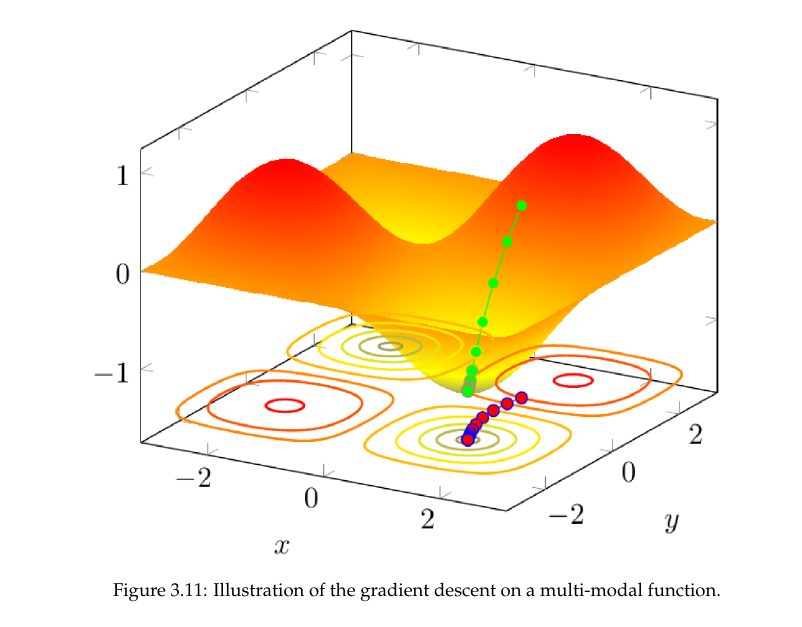

## Polynomial Regression is  linear regression

In [1]:
import numpy as np
X = np.array( [ [1, 5], [1, 6], [1, -5]])

In [2]:
X

array([[ 1,  5],
       [ 1,  6],
       [ 1, -5]])

In [4]:
X.shape

(3, 2)

In [10]:
theta = np.array([[5],[1]])

In [11]:
theta

array([[5],
       [1]])

In [12]:
theta.shape

(2, 1)

In [13]:
X.dot(theta)

array([[10],
       [11],
       [ 0]])

In [19]:
y = np.array([[1],[-3], [1]])
y.shape

(3, 1)

In [20]:
m = len(y)
j=((np.linalg.norm( X.dot(theta)- y))**2)*(1/(2*m))

In [21]:
j

46.33333333333332

$$ J = \frac{1}{2m} \| X \theta - y \|^2$$ 

## Uso de regresion lineal para ajustar datos a polinomios.
### Regresion polinomial tambien es regresion lineal, por que?

Piense en la siguiente funcion objetivo

$$ h(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n$$.
Esta funcion es una funcion en una variable polinomica de orden $n$.

Por que esto es regresion lineal

$$h(\theta, x) = X \theta$$
donde $X=(1, x, x^2, \cdots, x^n)$, $\theta = ( \theta_0, \theta_1, \cdots, \theta_n)$. 

Si tomamos $m$ muestras:

$$ h(\theta, x_m) = \theta_0 + \theta_1 x_m + \theta_2 x_m^2 + \cdots + \theta_n x_m^n$$.

en eswte caso
$X_m = (1, x_m, x_m^2, \cdots, x_m^n)$.
Si llevamos esto a una matriz


$$ \begin{pmatrix} 1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n \\
\end{pmatrix} 
\begin{pmatrix}
\theta_0 \\ \theta_1 \\ \vdots  \\ \vdots \\ \theta_n
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
\vdots \\
y_m
\end{pmatrix}$$

La nueva matriz $X$ no es necesariamente cuadrada. Si fuera cuadrada:
$m=n+1$  y en este caso asumiento que los $x$ distintos, este problema se llama
**interpolacion de Lagrange**. La matriz $X$ se llama la matriz de 
[Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix)

En este caso se ve que la interpolacion es un caso particular de la regresion. 

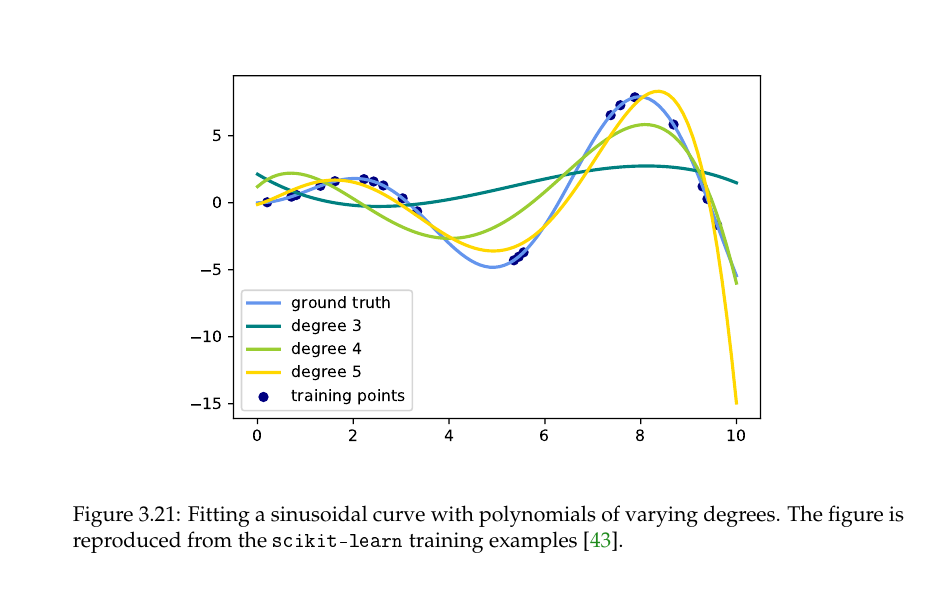

## Polinomios en varias variables. 
Digamos dos variables $(x_1, x_2)$. El problema se formula de igual forma
solo que la matriz $X$ cambia.

Vamos a ver:

Asumamos una funcion en dos variables, polinomica de orden 2.

$$ h(\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2  $$

La idea se extendiente, $\theta$ y $y$ son obvios. 

Pero $X$ es

$$  x=
 \begin{pmatrix} 1 & x_{11} & x_{12}^2 & x_{11} x_{12} & x_{11}^2 & x_{12}^2 \\
1 & x_{21} & x_{22}^2 & x_{11} x_{22} & x_{21}^2 & x_{22}^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots   \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & x_{m1} & x_{m2}^2 & x_{m1} x_{m2} & x_{m1}^2 & x_{m2}^2 \\
\end{pmatrix} 
$$ 

## Regresion lineal (polinomial) general

Ejemplo: Polinomio en 2 variables, de orden cubico, suprimimos el $x_1^2$, $x_2^2$.

$$h(\theta, x) = p_{\theta}(x_1, x_2) =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_2 x_2 + \theta_4 x_1^2 x_2 + \theta_5 x_1 x_2^2 + \theta_6 x_1^3 + \theta_7 x_2^3  $$

$$X = 
\begin{pmatrix}
1 & x_{11}  & x_{12} & x_{11}^2 x_{12} & x_{11} x_{12}^2 & x_{11}^3 & x_{12}^3 \\
1 & x_{21}  & x_{22} & x_{21}^2 x_{22} & x_{21} x_{22}^2 & x_{21}^3 & x_{22}^3 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{m1}  & x_{m2} & x_{m1}^2 x_{m2} & x_{m1} x_{m2}^2 & x_{m1}^3 & x_{m2}^3 
\end{pmatrix}
$$

Note que las columnas tienen mucho grado de dependencia, por ejemplo en el polinomio en una variable, la columna 2, elevala a la 0 produce la columna 1, elevada a la 1 produce la columna 2, elevada a la 2 produce la columna 3, y asi suscesivamente, hasta que elevada a la $n$ produce la columna $n+1$. Esto no es bueno. 



## Unverfitting vs Overfitting (sub-ajuste vs sobreajuste).

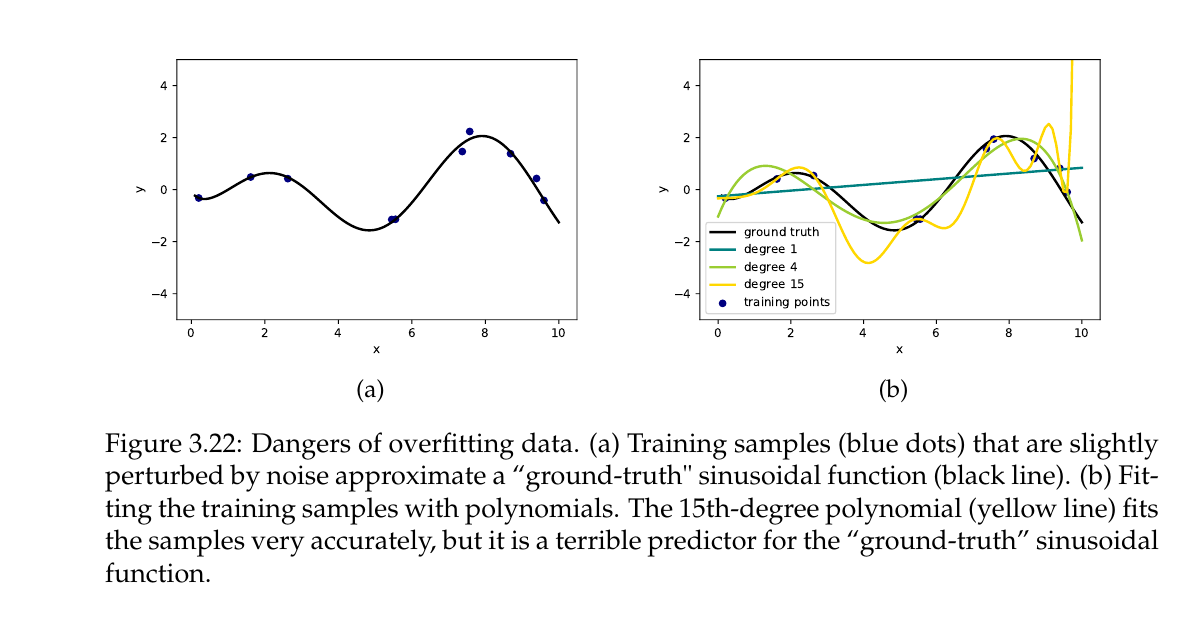Sobreajuste es cuando el modelo se ajusta muy bien a los datos, al punto de que si le meten
ruido, se va por el ruido generando modelos incorrectos. 



La funcion en la grafica de arriba es $y=\log x \sin x$

Con respecto a **sobreajuste** (**overfitting**)

* En la practica $m \gg n$. Podriamos incrementar el numero de "features" (atributos) para $m \approx n$ pero incurririamos en costos muy elevados. El $m \gg n$ puede ser ventajoso por el problema de minimos cuadrados tiene solucion.  Si $n$ lo acercamos a $m$ podriamos estar forzando el problema hacia "overfitting". Una forma de incrementar $n$ es eligiendo un polinomio de grado mas alto $n \gg 1$. 

* Si $n$ es muy grande, la curva (superficie) oscilla mucho. 
Las oscilaciones no siempre son buenas. En el caso de los polinomios generan errores muy grandes, sobre todo en los bordos o fuera de ellos (efecto 
[Runge](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge)).



Por que sobreajuste es no deseado:

* En sobreajuste el modelo sigue muy de cerca el ruido. Si hay ruido, este contamina mucho mas el modelo. 
* El sobreajuste puede introducir oscilaciones de alta frecuencia y de alta amplitud
* Es mas costoso entrenar modelos donde $n$ es grande.
* Al final, no queremos un modelo de regresion que no se ajuste a datos nuevos. Es decir, que no **generalice** .

8:00 am.



**Underfitting**: El termino (subajuste) siginifca que el modelo falla en ajustar los datos propiamente por que se **queda corto**.
Por ejemplo el modelo lineal en los de la grafica anterior. 

Como se puede reducir el "overfitting"

1. reducir el numero de features (atributos). Pero no mucho.
2. incrementar el coeficiente de regularizacion.
3. incrementar los datos. 
4. usar una tecnica donde se usan datos para entrenamiento y **otros** para prueba.

Para entender el punto 2. hablemos de la reguraizacion en la regresion polinomial.

Recuerden la funcion objetivo


$$ J(\theta) = \frac12 \| X \theta - y \|^2 + \lambda \| \theta \|^2  $$.

Si $\lambda$ es grande la solucion tiene a 0, no tiene overfitting, pero probablemente puede tener underfitting.

Para el punto 4.  esperemos un poco.




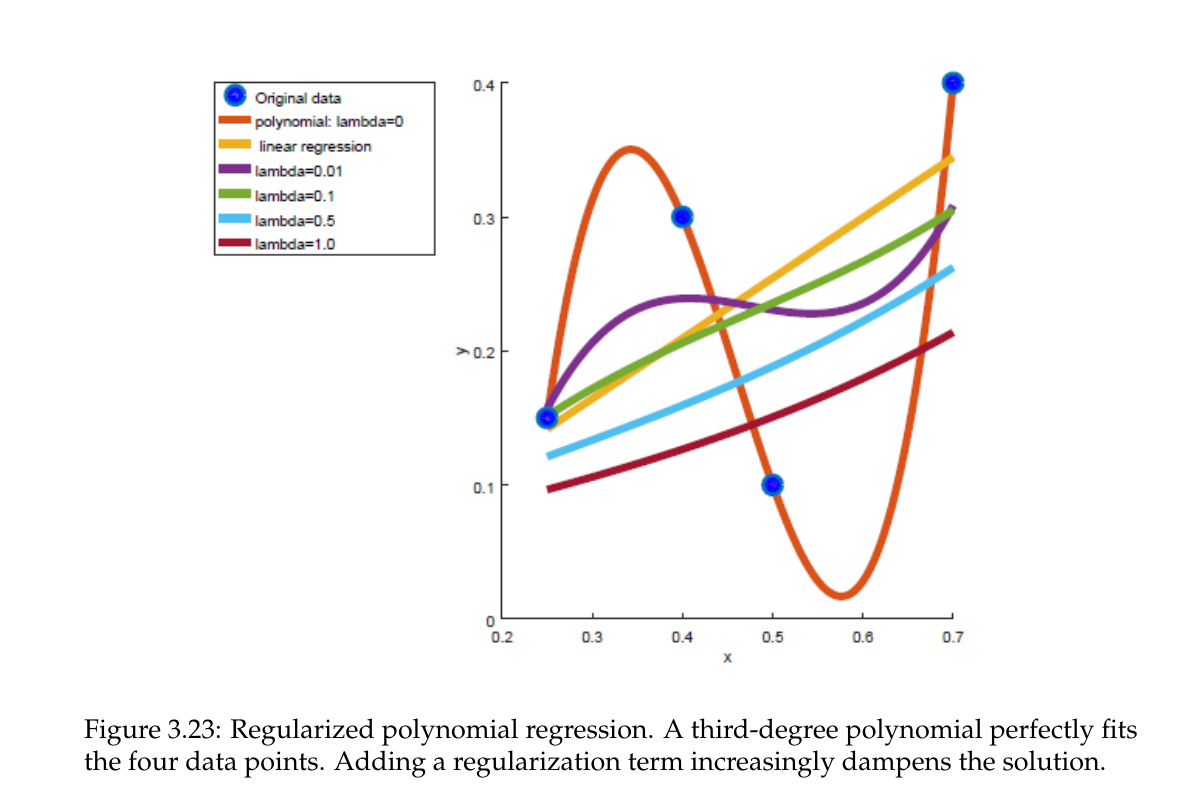

## Regresion en general.
Con el siguiente ejemplo de hipotesis mostramos que los modelos pueden ir mucho mas alla de los que hemos estudiado.

$$ h(\theta, x) = \theta_0 + \theta_1 \sqrt{x} $$

Otro ejemplo


$$ h(\theta, x) = \theta_0 + \theta_1 \sqrt{x} + \theta_2 \exp(x_2) $$

Este modelo sigue siendo lineal en $\theta$, en $x$ no es lineal.

Que pasa si el modelo no es lineal en $\theta$? La teoria que desarrollamos aca no funciona. Pero se pueden hacer trucos que conviertan un modelo que no es lineal en $\theta$ a un modelo que sea lineal en $\theta$.

Ej: La ley de Kepler.  Kepler (1571-1630) uso los datos que tomo Tycho Brahe y construyo sus leyes donde por ejemplo determina que el periodo de giro de un planeta al rededer del sol dependen de la distancia media al mismo.  Kepler ajusto sus datos a la ecuacion

$$ T(r, \theta) = \alpha r^{\theta_1} $$
$\theta=(\theta_0, \theta_1)$, $\theta_0?$ . Truco: logaritmo. 



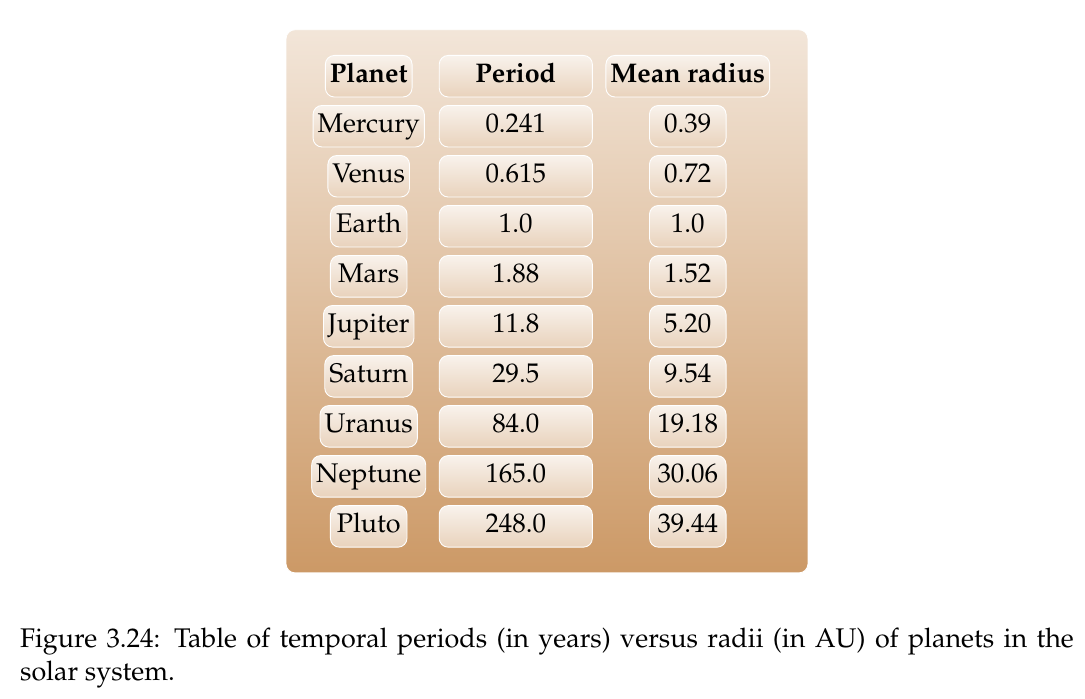

|   Planeta| Periodo   | Radio Medio  
|---|---|---|
|  Mercurio |  0.241  | 0.39  |
|  Venus |  0.615 | 0.72  | 
|  Earth  | 1.0   |  1.0 |
|Mars | 1.88   | 1.52 |
|Jupiter  | 11.8   | 5.20 |
| Saturn | 29.5   | 9.54 |
|Uranus  | 84.0   | 19.18 |
|Neptune   | 165.0   | 30.06 |
|Pluto  | 248.0   | 39.44 |


Para el punto 4.  Si se tiene un conjunto de datos, no se debe usar todo para el entrenamiento. Hay varias tecnicas:

1. Partirlos en 2, por decir 70% para entrenamiento   y 30% para prueba. 
2. Partirlos en 3. Por ejemplo 40% para entrenamiento 30% para validacion (cross-validation) y 30% para prueba.

3. K-fold cross validation: Se dividen los datos en $k$ grupos. Se entrenan con $k-1$ grupos y se validan con restante. Se rotan los grupos de forma que todos los datos pasen por entrenamiento y prueba. En cada ciclo se sacan las estadisticas (el accuracy, precision, etc) y se promedian. Las estadisticas miden el error.

En otra clase definimos "accuracy", "precision", etc. 

Si el error es muy grande (mas grande que algun umbral) entonces
se rechaza el modelo. Que podemos hacer? tomar mas datos o cambiar los parametros. Por ejemplo en vez de polinomios cubicos usar cuarticos, quinticos o funciones con raices cuadradas.

Todo esto se llama QC=Quality Control , control de calidad. 

# Clasificacion:
Por que la clasificacion es importante y que problemas resolvemos con clasificacion.

* un paciente tiene cancer "si" o "no"? 
* un estudiante va a salir exitoso de la prueba en neuromatematica del parelelepipedo. Tema de tesis de doctorado de usteds. Facereader.
* un servidor de email detecta que mensajes son "spam" y cuales no.
* alertas de fraude en tarjetas de credito
* bancos predicen si usted va a dejar de pagar un credito hipotecario.
* etc.

No todas las variables son dicotomicas (binarias) 1 o 0 ,   si o no, falso o verdadero. Pero todos los problemas se pueden llevar a este estado binario (lo vemos mas adelante).

Vamos a ver, en este curso:
* Regresion logisticas (proxima clase)
* Redes neuronales (2 clases luego de la proxima)
* SVM: Support Vector Machines (2 ? clases)

##  Regresion logistica
El problema que presenta la regresion logistica con respecto a la lineal es que la variable que decide es discreta: Yes or NOt, True or False, 1 or 0. La regresion lineal trabaja con variables continuas. El modelo

$$ h(\Theta) = X \Theta = Y$$
$$ \min_{\Theta} J(\Theta) = \min_{\Theta} \frac12 \| X \Theta - Y \|^2 $$
no es adecuado para los problemas de clasificacion de los que hablamos arriba.  Por que en vez de manejar variables continuas, tenemos variables (dependiente, $Y$) dicotomica (dichotomous dependent variables). Como vamos a resolver este problema.

Pre-requisitos: estadistica basica, likelihood function (verosimilitud). Por ejemplo lo del paciente con cancer:

$$ p( q_i \text{   tenga cancer} | x_i, \Theta) \ge \texttt{umbral}  $$
